
# Shared rides with pricing - Delft 

 ### Choice Function (Deterministic):
 `pool_price.py`
 * Pickup Distance: distance from driver initial position to the first pickup point
 * Travel Distance: distance from driver's initial position to the drop off point of the last passenger
 * Operating Cost: This include all the expenses
 * Profit: Driver revenue to serve the request
            
 
  ### KPI:
   
   * Profit of Individual driver
   * Profit of all the drivers
   * No.of rejected rides
   * U - PAX (Utility) 
  
   ### TBD- Choice Function (Probablistic):
  
  * choice logic to be applied inside `pool_price.py` 
  * P(R)= exp(beta * Profit_R)/ sum_all the rides( exp(beta * Profit_R)
 



In [2]:
%load_ext autoreload
%autoreload 2
import os, sys # add MaaSSim to path (not needed if MaaSSim is already in path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from MaaSSim.utils import get_config, load_G, prep_supply_and_demand, generate_demand, generate_vehicles, initialize_df  # simulator
from MaaSSim.data_structures import structures as inData
from MaaSSim.simulators import simulate
from MaaSSim.visualizations import plot_veh
from MaaSSim.shared import prep_shared_rides
import logging
import matplotlib.pyplot as plt

import pandas as pd
import ExMAS


## Pricing for Delft, Netherlands

In [4]:
params = get_config('../../data/config/delft.json')  # load configuration

params.times.pickup_patience = 3600 # 1 hour of simulation
params.simTime = 0.1 # 6 minutes hour of simulation
params.nP = 10 # reuqests (and passengers)
params.nV = 10 # vehicles
params.kpi = 1 # vehicles


## Parameters for ExMAS

In [5]:
params.t0 = pd.Timestamp.now()
params.shareability.avg_speed = params.speeds.ride
params.shareability.shared_discount = 0.3
params.shareability.delay_value = 1
params.shareability.WtS = 1.3
params.shareability.price = 1.5 #eur/km
params.shareability.VoT = 0.0035 #eur/s
params.shareability.matching_obj = 'u_pax' #minimize VHT for vehicles
params.shareability.pax_delay = 0
params.shareability.horizon = 600
params.shareability.max_degree = 4
params.shareability.nP = params.nP
params.shareability.share = 1
params.shareability.without_matching = True
params.shareability.operating_cost = 0.5
params.shareability.comm_rate = 0.2

inData = load_G(inData, params)  # load network graph 

inData = generate_demand(inData, params, avg_speed = False)
inData.vehicles = generate_vehicles(inData,params.nV)
inData.vehicles.platform = inData.vehicles.apply(lambda x: 0, axis = 1)
inData.passengers.platforms = inData.passengers.apply(lambda x: [0], axis = 1)
inData.requests['platform'] = inData.requests.apply(lambda row: inData.passengers.loc[row.name].platforms[0], axis = 1) 
inData.platforms = initialize_df(inData.platforms)
inData.platforms.loc[0]=[1,'Uber',30]
params.shareability.share = 1
params.shareability.without_matching = True

inData = ExMAS.main(inData, params.shareability, plot=False) # create shareability graph (ExMAS) 


26-02-23 10:14:24-INFO-Initializing pairwise trip shareability between 10 and 10 trips.
26-02-23 10:14:24-INFO-creating combinations
26-02-23 10:14:24-INFO-90	 nR*(nR-1)
26-02-23 10:14:24-INFO-Reduction of feasible pairs by 87.78%
26-02-23 10:14:24-INFO-Degree 2 	Completed
26-02-23 10:14:24-INFO-trips to extend at degree 2 : 24
26-02-23 10:14:24-INFO-At degree 2 feasible extensions found out of 8 searched
26-02-23 10:14:24-INFO-Degree 3 	Completed
26-02-23 10:14:24-INFO-trips to extend at degree 3 : 8
26-02-23 10:14:24-INFO-At degree 3 feasible extensions found out of 0 searched
26-02-23 10:14:24-INFO-Degree 4 	Completed
26-02-23 10:14:24-INFO-Max degree reached 4
26-02-23 10:14:24-INFO-Trips still possible to extend at degree 4 : 0


In [6]:
inData = prep_shared_rides(inData, params.shareability) # prepare schedules

26-02-23 10:14:24-INFO-Matching 10 trips to 42 rides in order to min u_pax
26-02-23 10:14:24-INFO-Problem solution: Optimal. 
Total costs for single trips:             57 
reduced by matching to:                   52


In [7]:
inData.sblts.rides


,indexes,u_pax,u_veh,kind,u_paxes,times,indexes_orig,indexes_dest,degree,index,...,row,selected,nodes,req_id,sim_schedule,ttrav,dist,fare,commission,driver_revenue
0,[0],10.056000,543,1,[10.056000000000001],"[0, 543]",[0],[0],1,0,...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 260125198, 4715765487]","[None, 0, 0]",node time req_id od 0 ...,543,5.43,8.15550,1.63110,6.52440
1,[1],5.249000,283,1,[5.249],"[18, 283]",[1],[1],1,1,...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 839334890, 1435362533]","[None, 1, 1]",node time req_id od 0 ...,283,2.83,4.25850,0.85170,3.40680
2,[2],1.782000,96,1,[1.782],"[70, 96]",[2],[2],1,2,...,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 1474883280, 1584502773]","[None, 2, 2]",node time req_id od 0 ...,96,0.96,1.44600,0.28920,1.15680
3,[3],5.656000,305,1,[5.656],"[76, 305]",[3],[3],1,3,...,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 44840008, 1608998223]","[None, 3, 3]",node time req_id od 0 ...,305,3.05,4.58850,0.91770,3.67080
4,[4],5.904500,319,1,[5.9045000000000005],"[106, 319]",[4],[4],1,4,...,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 672983381, 527060635]","[None, 4, 4]",node time req_id od 0 N...,319,3.19,4.78800,0.95760,3.83040
5,[5],5.035000,272,1,[5.035],"[117, 272]",[5],[5],1,5,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",0,"[None, 3669138217, 1448535917]","[None, 5, 5]",node time req_id od 0 ...,272,2.72,4.08300,0.81660,3.26640
6,[6],6.569000,355,1,[6.569],"[206, 355]",[6],[6],1,6,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",0,"[None, 44891423, 44792321]","[None, 6, 6]",node time req_id od 0 NaN...,355,3.55,5.32650,1.06530,4.26120
7,[7],7.117500,384,1,[7.117500000000001],"[233, 384]",[7],[7],1,7,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",0,"[None, 4474326710, 643586572]","[None, 7, 7]",node time req_id od 0 ...,384,3.84,5.77350,1.15470,4.61880
8,[8],2.768500,149,1,[2.7685],"[239, 149]",[8],[8],1,8,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",0,"[None, 44822489, 643586570]","[None, 8, 8]",node time req_id od 0 N...,149,1.49,2.24700,0.44940,1.79760
9,[9],7.606500,411,1,[7.6065000000000005],"[288, 411]",[9],[9],1,9,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 44818490, 44759522]","[None, 9, 9]",node time req_id od 0 NaN...,411,4.11,6.16800,1.23360,4.93440


In [107]:
rf[(rf['indexes_orig'].map(len) > 1) & (rf['driver_revenue']==rf['driver_revenue'].max())].iloc[0]

indexes                                                    [1, 5, 4]
u_pax                                                        20.5492
u_veh                                                            880
kind                                                              31
u_paxes              [9.6418, 7.423499999999999, 3.4838999999999993]
times                                [34.0, 142, 225, 200, 118, 195]
indexes_orig                                               [1, 5, 4]
indexes_dest                                               [4, 5, 1]
degree                                                             3
index                                                             22
lambda_r                                                    0.233449
PassHourTrav_ns                                                 1148
row                [0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...
selected                                                           0
nodes              [None, 15198900

## Simulation with MaaSSim 

In [41]:
sim = simulate(params = params, inData = inData, logger_level = logging.WARNING) # simulate

14-02-23 22:41:55-WARNING-Setting up 0.1h simulation at 2023-02-14 22:36:59 for 10 vehicles and 10 passengers in Delft, Netherlands
0.5
14-02-23 22:41:55-CRITICAL-this is request 0 with [0, 16] available rides.
14-02-23 22:41:55-CRITICAL-ride 0 available [1]
14-02-23 22:41:55-CRITICAL-ride 16 available [1, 0]
14-02-23 22:41:55-CRITICAL-this is reuqest 0 with [0, 16] still available rides.
hell
indexes                                                       [0, 9]
u_pax                                                        7.98665
u_veh                                                            370
kind                                                              21
u_paxes                                  [5.281149999999999, 2.7055]
times                                           [55.0, 166, 163, 41]
indexes_orig                                                  [0, 9]
indexes_dest                                                  [9, 0]
degree                                             

In [72]:
sim.res[0].pax_exp



,ACCEPTS_OFFER,ARRIVES_AT_DROPOFF,ARRIVES_AT_PICKUP,DEPARTS_FROM_PICKUP,MEETS_DRIVER_AT_PICKUP,RECEIVES_OFFER,REQUESTS_RIDE,SETS_OFF_FOR_DEST,STARTS_DAY,IS_REJECTED_BY_VEHICLE,REJECTS_OFFER,ARRIVES_AT_DEST,PREFERS_OTHER_SERVICE,LOSES_PATIENCE,TRAVEL,WAIT,OPERATIONS
pax,,,,,,,,,,,,,,,,,
0,15.0,112.0,20.0,30.0,87.0,0.0,0.0,10.0,0,0,0,0,0,0,112.0,87.0,55.0
1,15.0,801.0,20.0,30.0,46.0,101.0,37.0,10.0,0,0,0,0,0,0,801.0,147.0,55.0
2,15.0,826.0,20.0,30.0,181.0,114.0,73.0,10.0,0,0,0,0,0,0,826.0,295.0,55.0
3,15.0,217.0,20.0,30.0,155.0,0.0,75.0,10.0,0,0,0,0,0,0,217.0,155.0,55.0
4,15.0,314.0,20.0,30.0,74.0,131.0,104.0,10.0,0,0,0,0,0,0,314.0,205.0,55.0
5,15.0,424.0,35.0,30.0,183.0,37.0,121.0,10.0,0,0,0,0,0,0,424.0,220.0,55.0
6,15.0,298.0,35.0,30.0,466.0,73.0,134.0,10.0,0,0,0,0,0,0,298.0,539.0,55.0
7,15.0,94.0,35.0,30.0,112.0,104.0,151.0,10.0,0,0,0,0,0,0,94.0,216.0,55.0
8,15.0,293.0,20.0,30.0,71.0,0.0,282.0,10.0,0,0,0,0,0,0,293.0,71.0,55.0


In [48]:
responses = []
for i in range(1, 4):
    params.kpi = i
    sim = simulate(params = params, inData = inData, logger_level = logging.WARNING) # simulate
    sim.res[0].veh_exp['Vehicles'] = sim.res[0].veh_exp.index
    sim.res[0].veh_exp['ds'] = f"{i}"
    responses.append(sim.res[0].veh_exp)
    

14-02-23 22:44:16-WARNING-Setting up 0.1h simulation at 2023-02-14 22:36:59 for 10 vehicles and 10 passengers in Delft, Netherlands
0.5
14-02-23 22:44:16-CRITICAL-this is request 0 with [0, 16] available rides.
14-02-23 22:44:16-CRITICAL-ride 0 available [1]
14-02-23 22:44:16-CRITICAL-ride 16 available [1, 0]
14-02-23 22:44:16-CRITICAL-this is reuqest 0 with [0, 16] still available rides.
14-02-23 22:44:16-CRITICAL-vehicle 1 has 2 choices
14-02-23 22:44:16-CRITICAL-vehicle 1 has chosen to serve request 0 with a ride 0 of degree 1, with travellers [0].
0.5
14-02-23 22:44:16-CRITICAL-this is request 1 with [1, 10] available rides.
14-02-23 22:44:16-CRITICAL-ride 1 available [1]
14-02-23 22:44:16-CRITICAL-ride 10 available [1, 0]
14-02-23 22:44:16-CRITICAL-this is reuqest 1 with [1, 10] still available rides.
14-02-23 22:44:16-CRITICAL-vehicle 2 has 2 choices
14-02-23 22:44:16-CRITICAL-vehicle 2 has chosen to serve request 1 with a ride 10 of degree 2, with travellers [1, 5].
0.5
14-02-23

In [74]:
sim.res[0].veh_exp

,nRIDES,nREJECTED,OUT,STARTS_DAY,OPENS_APP,RECEIVES_REQUEST,ACCEPTS_REQUEST,REJECTS_REQUEST,IS_ACCEPTED_BY_TRAVELLER,IS_REJECTED_BY_TRAVELLER,...,DECIDES_NOT_TO_DRIVE,ENDS_SHIFT,TRAVEL,WAIT,CRUISE,OPERATIONS,IDLE,PAX_KM,REVENUE,nREJECTS
veh,,,,,,,,,,,,,,,,,,,,,
1,2.0,0.0,False,0,0,29.0,30.0,0,40.0,0,...,0,6762.0,325.0,0,313.0,130.0,5994.0,3.264,2.56560,NaN
2,0.0,0.0,False,0,0,0.0,0.0,0,0.0,0,...,0,7559.0,0.0,0,0.0,0.0,7559.0,0.000,0.00000,NaN
3,1.0,0.0,False,0,0,282.0,15.0,0,20.0,0,...,0,6848.0,293.0,0,71.0,65.0,6419.0,2.937,3.52440,NaN
4,1.0,0.0,False,0,0,75.0,15.0,0,20.0,0,...,0,7047.0,217.0,0,155.0,65.0,6610.0,2.174,2.60880,NaN
5,0.0,0.0,False,0,0,0.0,0.0,0,0.0,0,...,0,7559.0,0.0,0,0.0,0.0,7559.0,0.000,0.00000,NaN
6,0.0,0.0,False,0,0,222.0,0.0,0,0.0,0,...,0,7337.0,0.0,0,0.0,0.0,7337.0,0.000,0.00000,NaN
7,2.0,0.0,False,0,0,104.0,15.0,0,186.0,0,...,0,6871.0,241.0,0,82.0,261.0,6287.0,2.946,2.47464,NaN
8,2.0,0.0,False,0,0,73.0,15.0,0,169.0,0,...,0,6300.0,506.0,0,436.0,244.0,5114.0,8.377,7.03668,NaN
9,0.0,0.0,False,0,0,0.0,0.0,0,0.0,0,...,0,7559.0,0.0,0,0.0,0.0,7559.0,0.000,0.00000,NaN


<AxesSubplot: xlabel='Vehicles', ylabel='REVENUE'>

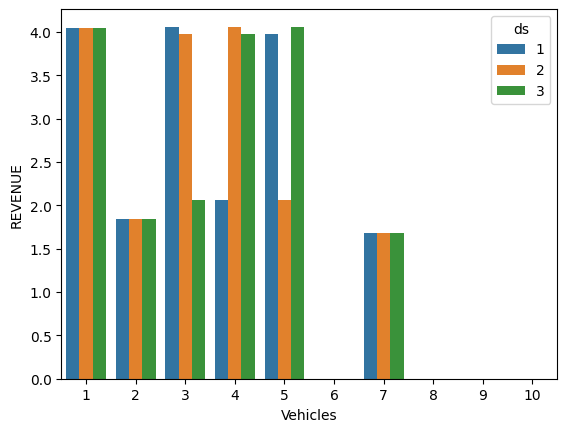

In [49]:
import seaborn as sns
datasets = pd.concat([*responses])

sns.barplot(x='Vehicles', y='REVENUE',hue='ds',  data=datasets)

,nRIDES,nREJECTED,OUT,STARTS_DAY,OPENS_APP,RECEIVES_REQUEST,ACCEPTS_REQUEST,REJECTS_REQUEST,IS_ACCEPTED_BY_TRAVELLER,IS_REJECTED_BY_TRAVELLER,...,DECIDES_NOT_TO_DRIVE,ENDS_SHIFT,TRAVEL,WAIT,CRUISE,OPERATIONS,IDLE,PAX_KM,REVENUE,nREJECTS
veh,,,,,,,,,,,,,,,,,,,,,
1,2.0,0.0,False,0,0,29.0,30.0,0,40.0,0,...,0,6762.0,325.0,0,313.0,130.0,5994.0,3.264,2.56560,NaN
2,0.0,0.0,False,0,0,0.0,0.0,0,0.0,0,...,0,7559.0,0.0,0,0.0,0.0,7559.0,0.000,0.00000,NaN
3,1.0,0.0,False,0,0,282.0,15.0,0,20.0,0,...,0,6848.0,293.0,0,71.0,65.0,6419.0,2.937,3.52440,NaN
4,0.0,0.0,False,0,0,0.0,0.0,0,0.0,0,...,0,7559.0,0.0,0,0.0,0.0,7559.0,0.000,0.00000,NaN
5,2.0,0.0,False,0,0,104.0,15.0,0,186.0,0,...,0,6871.0,241.0,0,82.0,261.0,6287.0,2.946,2.47464,NaN
6,0.0,0.0,False,0,0,222.0,0.0,0,0.0,0,...,0,7337.0,0.0,0,0.0,0.0,7337.0,0.000,0.00000,NaN
7,2.0,0.0,False,0,0,37.0,15.0,0,156.0,0,...,0,6509.0,629.0,0,153.0,231.0,5496.0,9.497,7.97748,NaN
8,1.0,0.0,False,0,0,75.0,15.0,0,20.0,0,...,0,7047.0,217.0,0,155.0,65.0,6610.0,2.174,2.60880,NaN
9,2.0,0.0,False,0,0,73.0,15.0,0,169.0,0,...,0,6300.0,506.0,0,436.0,244.0,5114.0,8.377,7.03668,NaN


In [63]:
sim.res[0].all_kpi # All driver revenue 

26.889719999999997

In [69]:
sim.params.kpi





2

In [64]:
sim.res[0].veh_exp['REVENUE'].to_list()

[4.1537999999999995,
 4.6655999999999995,
 2.0148,
 5.080319999999999,
 0.0,
 0.0,
 3.8964,
 4.4052,
 2.6736000000000004,
 0.0]

In [52]:

list(sim.vehs.keys())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [53]:
sim.res[0].all_kpi

26.889719999999997

## Plotting Graph of driver vs revenue

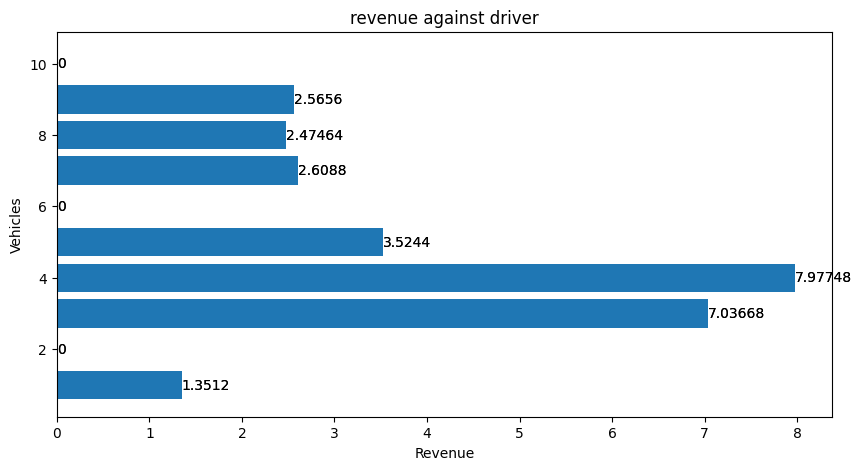

In [76]:
# plot graph of driver revenue
vehicles  = list(sim.res[0].veh_exp.index.to_list())
revenues = sim.res[0].veh_exp['REVENUE'].to_list()
fig, ax = plt.subplots(figsize = (10,5))
bars = ax.barh(vehicles, revenues)
ax.bar_label(bars)
for bars in ax.containers:
    ax.bar_label(bars)


plt.xlabel("Revenue")
plt.ylabel("Vehicles")
plt.title("revenue against driver")
plt.show()

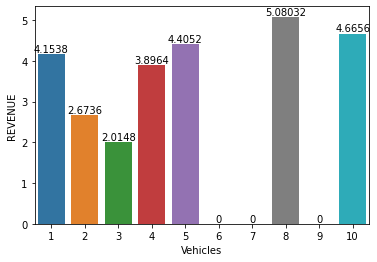

In [55]:
import seaborn as sns
sim.res[0].veh_exp['Vehicles'] = sim.res[0].veh_exp.index

ax =sns.barplot(data=sim.res[0].veh_exp, x="Vehicles", y="REVENUE")
for i in ax.containers:
    ax.bar_label(i,)

<AxesSubplot: xlabel='day', ylabel='total_bill'>

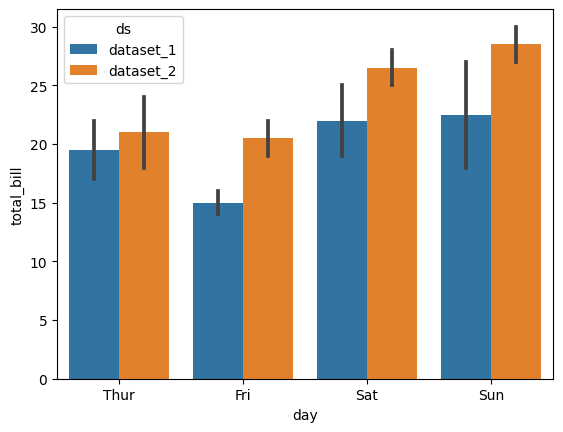

In [82]:

import seaborn as sns
import pandas as pd

ds1 = pd.DataFrame({'day':['Thur','Fri', 'Sat', 'Sun', 'Thur','Fri', 'Sat', 'Sun'],
                   'total_bill': [17,14,19,18, 22, 16, 25, 27]})

ds2 = pd.DataFrame({'day':['Thur','Fri', 'Sat', 'Sun', 'Thur','Fri', 'Sat', 'Sun'],
                   'total_bill': [18,22,25,27, 24,19,28,30]})

ds2['ds'] = 'dataset_2'
ds1['ds'] = 'dataset_1'
dss = pd.concat([ds1, ds2])
sns.barplot(x='day', y='total_bill', hue='ds', data=dss)